<a href="https://colab.research.google.com/github/KevinHern/SemOpLabs/blob/master/Lab4/Laboratorio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [0]:
#Getting Fashion MNIST dataset

(train_images_or, train_labels), (test_images_or, test_labels) = fashion_mnist.load_data()

# reshape dataset to have a single channel
train_images = train_images_or.reshape((train_images_or.shape[0], 28, 28, 1))
test_images = test_images_or.reshape((test_images_or.shape[0], 28, 28, 1))

#Partitioning training data into training and validation

validation_images = train_images[:20000]
validation_labels = train_labels[:20000]
train_images = train_images[20000:60000]
train_labels = train_labels[20000:60000]

In [0]:
#Gray Scaling to reduce processing and increase performance
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
## MAKING A CONVNET

model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3)),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
#Training Model

history = model.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels))

#Observations:
#   - Loss decreases very slowly with 2 convolution layers
#   - Model works pretty well with just 1 convolution layer

Train on 40000 samples, validate on 20000 samples
Epoch 1/10
40000/40000 [==============================] - 34s 845us/sample - loss: 0.5080 - accuracy: 0.8270 - val_loss: 0.4816 - val_accuracy: 0.8395
Epoch 2/10
40000/40000 [==============================] - 34s 848us/sample - loss: 0.4743 - accuracy: 0.8385 - val_loss: 0.4041 - val_accuracy: 0.8662
Epoch 3/10
40000/40000 [==============================] - 34s 845us/sample - loss: 0.4623 - accuracy: 0.8405 - val_loss: 0.4163 - val_accuracy: 0.8617
Epoch 4/10
40000/40000 [==============================] - 34s 843us/sample - loss: 0.4447 - accuracy: 0.8478 - val_loss: 0.4232 - val_accuracy: 0.8729
Epoch 5/10
40000/40000 [==============================] - 34s 844us/sample - loss: 0.4187 - accuracy: 0.8525 - val_loss: 0.3912 - val_accuracy: 0.8759
Epoch 6/10
40000/40000 [==============================] - 34s 846us/sample - loss: 0.4230 - accuracy: 0.8545 - val_loss: 0.3720 - val_accuracy: 0.8742
Epoch 7/10
40000/40000 [====================

In [0]:
classifications = model.predict(test_images)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 4.0195186e-08 0.0000000e+00 4.2023121e-06 0.0000000e+00 9.9999571e-01]
9
[1.7286860e-05 0.0000000e+00 9.9986732e-01 1.0922224e-06 5.9870235e-06
 0.0000000e+00 1.0838003e-04 0.0000000e+00 3.6547312e-09 0.0000000e+00]
2
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[1.91983953e-01 3.35059844e-12 4.46073301e-02 8.04578012e-04
 2.92097069e-02 9.88633478e-15 7.33376324e-01 1.20613485e-14
 1.81187825e-05 1.33753591e-23]
6


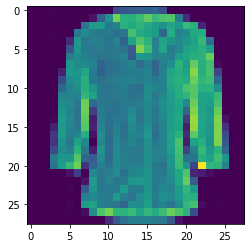

In [106]:
#Defining Categories
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#Testing ConvNet
for x in range(5):
  print(classifications[x]) #The bigger the number, its the prediction
  print(test_labels[x])     #Actual prediction

  plt.imshow(test_images_or[x])     #Number